## Acceso al servicio de estimación de población

Este Notebook es una edición del que está disponible en: <https://github.com/gyetman/popgrid_service_demo>

El servicio estimación de población de **POPGRID** tiene un `endpoint` (URL de un API) en un entorno REST, a través del cual acepta solicitudes con geometrías de polígonos y devuelve estimaciones de población para cada una de ellas. El endpoint puede ser accedido mediante un módulo de Python de ESRI (arcpy) o simplemente con los módulos de Python integrados. A continuación se presente un código que solo requiere el uso de Python 3.

El endpoint es autodescriptivo, solo debe ingresar al siguiente enlace: https://sedac.ciesin.columbia.edu/arcgis/rest/services/ciesin/popgrid_tools/GPServer

In [16]:
# Importando librerias requeridas
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Lectura del archivo en formato geoJSON
with open('dist_huanuco_simple_final.geojson', 'r', encoding="utf8") as f:
    data = json.load(f)
data.keys() # Se muestran las claves del diccionario generado.


dict_keys(['type', 'name', 'crs', 'features'])

In [18]:

# Creación de un diccionario vacío para alojar los resultados
stats_results = {}

# Construcción de la solicitud para cada polígono, las que se incluirán en los resultados 
for feature in data['features']:
    # Indicar un campo de nuestro polígono con valores únicos.
    id = f'{feature["properties"]["full_id"]}' 
    # Definición de la geometría y parámetros a calcular
    input_data = {
        'polygon': feature['geometry']['coordinates'][0],
        'variables': 'landscan-population-count_2015_1km',
        'statistics': ['SUM','MEAN'], 
        'requestID': id
    }
    # Solicitud de los parámetros
    request_params = {
        'Input_Data': str(input_data),
        'f': 'pjson',
        
    }

    url = 'https://sedac.ciesin.columbia.edu/arcgis/rest/services/ciesin/popgrid_tools/GPServer/popgrid_estimation/execute?'

    # Solicitud POST (envío de datos al servidor)
    r = requests.post(
        url,
        params=request_params,
    )

    # Verificación de la solicitud
    if str(r) == '<Response [200]>':
        stats_results[id] = r.json()
        print(f'Request {id} successful')
    else:
        print('Error')
        print(r)

Request r1954505 successful
Request r1954506 successful
Request r1954507 successful
Request r1954508 successful
Request r1954509 successful
Request r1954510 successful
Request r1954511 successful
Request r1954512 successful
Request r1954513 successful
Request r1954514 successful
Request r1954515 successful
Request r1954516 successful
Request r1954517 successful
Request r1954518 successful
Request r1954519 successful
Request r1954520 successful
Request r1954521 successful
Request r1954522 successful
Request r1954523 successful
Request r1954524 successful
Request r1954525 successful
Request r1954526 successful
Request r1954527 successful
Request r1954528 successful
Request r1954529 successful
Request r1954530 successful
Request r1954531 successful
Request r1954532 successful
Request r1954533 successful
Request r1954534 successful
Request r1954535 successful
Request r1954536 successful
Request r1954537 successful
Request r1954538 successful
Request r1954539 successful
Request r1954540 suc

In [19]:
# Ejemplo del resultado de un polígono
stats_results['r1954526']

{'results': [{'paramName': 'Response',
   'dataType': 'GPString',
   'value': {'estimates': {'landscan-population-count_2015_1km': {'SUM': '5599',
      'SHORTTITLE': 'LandScan Population Count 2015',
      'UNIT': 'persons',
      'MEAN': '6.66547619048'}},
    'resultCode': 0,
    'message': 'Request Succeeded',
    'requestID': 'r1954526'}}],
 'messages': []}

In [20]:
type(stats_results)

dict

In [21]:
# Creando una lista con los resultados
totals = []
for stats in stats_results.values():
    totals.append(float(stats['results'][0]['value']['estimates']['landscan-population-count_2015_1km']['SUM']))
len(totals)

84

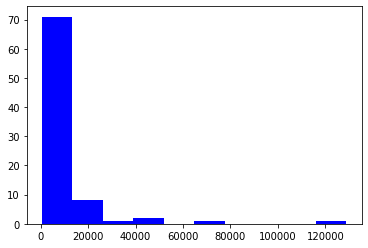

In [22]:
# Ploteo de un histograma con la lista de totales
_ = plt.hist(totals, color = 'blue')

In [23]:
# Elaborar una muestra de los totales
muestra_datos = totals[0:20]

In [24]:
# Generar una lista con las claves del diccionario para seleccionar valores
list_keys = list(stats_results.keys())
select_list = list_keys[0:20]

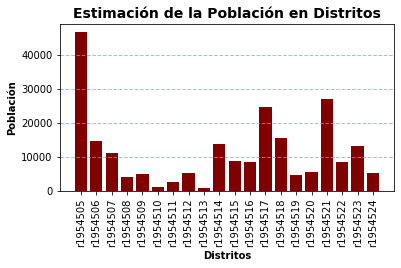

In [25]:
# Generación de un gráfico de barras con los resultados de estimación de población por cada polígono

ax = plt.bar(select_list, muestra_datos, color = 'maroon')
_ = plt.xticks(list(select_list), rotation=90)
_ = plt.subplots_adjust(bottom=0.3)
_ = plt.title("Estimación de la Población en Distritos", fontweight ='bold', fontsize = 14)
_ = plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
_ = plt.xlabel("Distritos", fontweight ='bold', fontsize = 10)
_ = plt.ylabel("Población", fontweight ='bold', fontsize = 10)

